In [101]:
%matplotlib inline

In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import cycle, islice
import seaborn as sns
import re

In [111]:
wetdogfood_df = pd.read_csv('wetdogfood_clean.csv',encoding="ISO-8859-1",index_col=0)
#wetdogfood_df.head()

In [112]:
###Calculate Unit Price
wetdogfood_df['unit_price']=wetdogfood_df['price']/wetdogfood_df['weight']
#wetdogfood_df=wetdogfood_df.drop(['price','weight'],axis=1)
#wetdogfood_df.sort_values(by='unit_price',ascending=False).head()

In [113]:
#group_brand_df=wetdogfood_df.groupby('brand')
#group_brand_df.describe()
#group_brand_df=wetdogfood_df[['brand']]

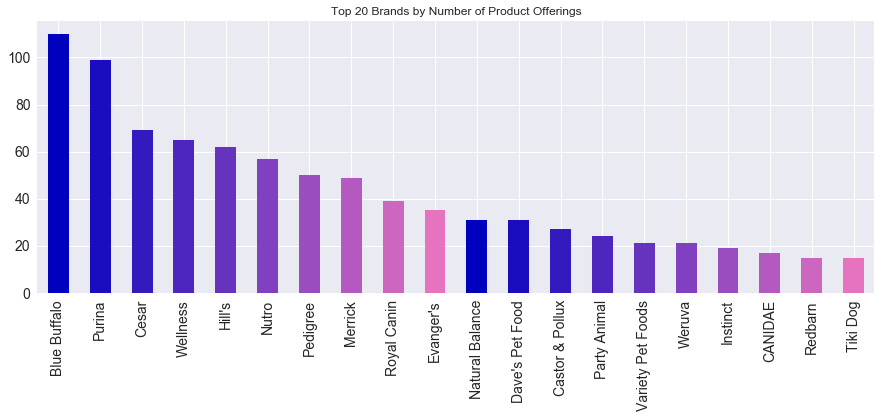

In [106]:
brand_series=wetdogfood_df['brand'].value_counts().sort_values(ascending=False)
top=20
my_colors = ['g', 'b']*5 # <-- this concatenates the list to itself 5 times.
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5 # <-- make two custom RGBs and repeatthem over all the bar elements.
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(10)] # <-- Quick gradient example along the Red/Green dimensions.
brand_series.head(top).plot(kind='bar', 
                           figsize=(15,5),
                           fontsize=14,
                           color=my_colors,
                          title='Top 20 Brands by Number of Product Offerings')

In [114]:
group_texture_df=wetdogfood_df[['brand','foodtexture']].groupby('foodtexture')
group_texture_df=group_texture_df.count().sort_values('brand',ascending=False).head(5)
group_texture_df.brand
#group_texture_df=group_texture_df['foodtexture'].value_counts().sort_values(ascending=False).head(5)

#pate_df.loc[wetdogfood_df.a==0,:]
#group_texture_df.boxplot(by='foodtexture', column='unit_price')
#plt.ylabel('Price per Pound ($)')

foodtexture
pate               622
stew               246
chunks in gravy    225
minced              87
shredded            33
Name: brand, dtype: int64

In [124]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0

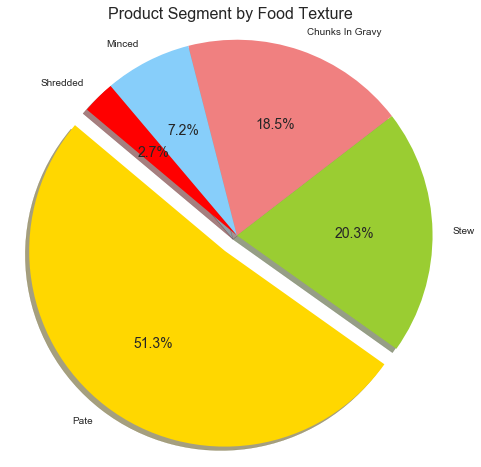

In [125]:
# Data to plot
#labels = 'Pate', 'Stew', 'Chunks in Gravy', 'Minced', 'Shredded'
labels=group_texture_df.index.str.title()
sizes = group_texture_df.brand
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(8,8))
plt.title('Product Segment by Food Texture', fontsize=16)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

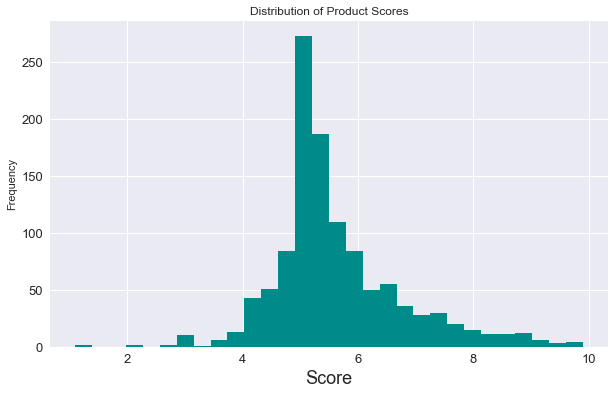

In [213]:
#score=lambda rev,rat:rat+5*(1-e** 
ratingscore_df=wetdogfood_df.drop(['price','weight','unit_price'],axis=1)
ratingscore_df['score']=ratingscore_df['rating']+5*(1-np.exp(-wetdogfood_df.review_cnt/100))
ratingscore_df.score.plot(kind='hist',figsize=(10,6),fontsize=13,bins=30,color='darkcyan',
                          title='Distribution of Product Scores').set_xlabel('Score',fontsize=18)


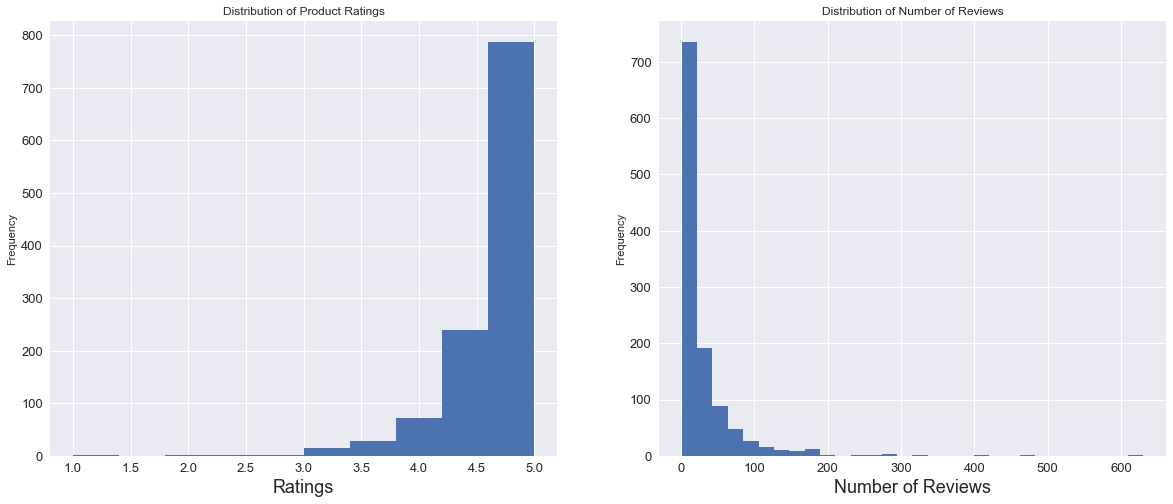

In [162]:

plt.figure(1) 
plt.subplot(121)
ratingscore_df.rating.plot(kind='hist',figsize=(20,8),fontsize=13,
                          title='Distribution of Product Ratings').set_xlabel('Ratings',fontsize=18)
plt.subplot(122)
ratingscore_df.review_cnt.plot(kind='hist',bins=30,figsize=(20,8),fontsize=13,
                              title='Distribution of Number of Reviews').set_xlabel('Number of Reviews',fontsize=18)

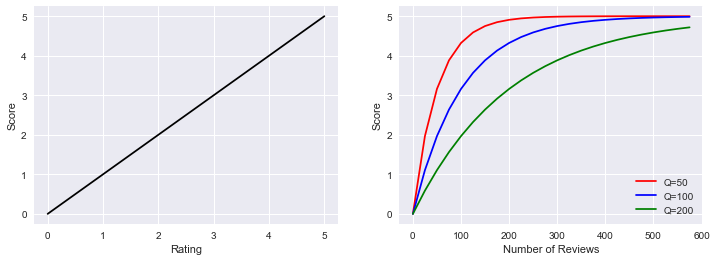

In [194]:
q0=50
q1=100
q2=200
xvals=np.arange(0,600,25)
y0vals=5*(1-np.exp(-xvals/q0))
y1vals=5*(1-np.exp(-xvals/q1))
y2vals=5*(1-np.exp(-xvals/q2))
plt.figure(figsize=(12,4)) 
plt.subplot(121)
plt.plot(range(0,6),range(0,6),'black')
plt.xlabel('Rating')
plt.ylabel('Score')
plt.subplot(122)
line0, =plt.plot(xvals,y0vals,'r',label='Q=50')
line1, =plt.plot(xvals,y1vals,'b',label='Q=100')
line2, =plt.plot(xvals,y2vals,'g',label='Q=200')
plt.legend(handles=[line0,line1,line2])
plt.xlabel('Number of Reviews')
plt.ylabel('Score')
#plt.figure(figsize=(18,8))
#fig = plt.gcf()


In [216]:
top30_score_df=ratingscore_df.sort_values('score',ascending=False).head(30)
print(len(top30_score_df.maker.unique()))
#len(top30_score_df.brand.unique())
top30_score_df=top30_score_df.drop(['product_list','brand','rating','review_cnt','score'],axis=1)[['maker','foodtexture']]
top30_score_df=top30_score_df.groupby(['foodtexture','maker']).size()
top30_score_df


9


foodtexture      maker                           
chunks in gravy  Rachael Ray Nutrish                 1
                 Royal Canin Veterinary Diet         1
                 Taste of the Wild                   2
minced           Purina Pro Plan Veterinary Diets    1
pate             Blue Buffalo                        2
                 Hill's Prescription Diet            6
                 Natural Balance                     3
                 Redbarn                             2
                 Royal Canin Veterinary Diet         4
stew             Blue Buffalo                        1
                 Hill's Prescription Diet            6
                 Whole Earth Farms                   1
dtype: int64

In [217]:

#top30_score_df.plot(kind='bar', stacked=True)
top30_totals = top30_score_df.sum(level=0)
print (top30_totals)

foodtexture
chunks in gravy     4
minced              1
pate               17
stew                8
dtype: int64


In [218]:

top30_score_df = top30_score_df.unstack(level=1).fillna(0)
#top30_score_df.columns = top30_score_df.columns.droplevel(level=0)
print(top30_score_df)

maker            Blue Buffalo  Hill's Prescription Diet  Natural Balance  \
foodtexture                                                                
chunks in gravy           0.0                       0.0              0.0   
minced                    0.0                       0.0              0.0   
pate                      2.0                       6.0              3.0   
stew                      1.0                       6.0              0.0   

maker            Purina Pro Plan Veterinary Diets  Rachael Ray Nutrish  \
foodtexture                                                              
chunks in gravy                               0.0                  1.0   
minced                                        1.0                  0.0   
pate                                          0.0                  0.0   
stew                                          0.0                  0.0   

maker            Redbarn  Royal Canin Veterinary Diet  Taste of the Wild  \
foodtexture           

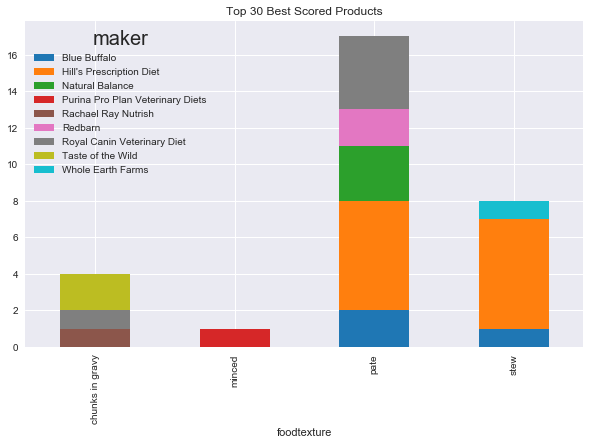

In [222]:
from matplotlib import cm
top30_score_df.plot(kind='bar', stacked=True,colormap=cm.Vega10,
                    figsize=(10,6),
                    title='Top 30 Best Scored Products')

(-5, 40)

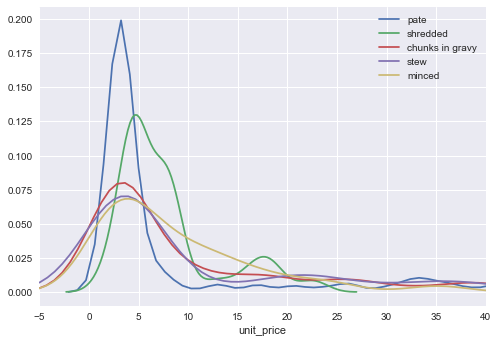

In [342]:
group_price_df=wetdogfood_df[['unit_price','foodtexture']]
#mean=group_price_df.unit_price.mean()
#group_price_df2=group_price_df.loc[
#list(map(lambda x: np.abs(x - x.mean()) / x.std() < 3, group_price_df.unit_price))
group_price_df=group_price_df[group_price_df['foodtexture'].isin(['pate','stew','chunks in gravy','minced','shredded'])]

group_price_df=group_price_df.groupby('foodtexture')
group_price_dflist=[group_price_df.get_group(x) for x in group_price_df.groups]
labels=list(map(lambda dflist:dflist.foodtexture.unique()[0],group_price_dflist))
labels
#len(group_price_dflist)
#labels=[group_price_dflist.foodtexture.unique()[0]]

#type(mygroups[0])
#labemygroups[0].foodtexture.unique()[0]
for i in range(len(group_price_dflist)):
    sns.distplot(mygroups[i].unit_price, hist=False, label=labels[i])
#sns.distplot(mygroups[1].unit_price, hist=False)
#sns.distplot(mygroups[2].unit_price, hist=False)
#sns.distplot(mygroups[3].unit_price, hist=False)
#sns.distplot(mygroups[4].unit_price, hist=False)
plt.xlim(-5, 40)
#group_price_df.groupby('foodtexture').describe()

#group_price_texture_df.plot.kde()
#df.groupby([df.ROI.str.split('_').str[0], 'Band']).Mean.plot.kde();
#group_price_texture_df.unstack(level=1).fillna(0)
#sns.distplot(group_price_df.unit_price, hist=False)
#group_price_df.sort_values('unit_price',ascending=False).head(100)
#print(group_price_df.shape)
#print(group_price_df.unit_price.describe())


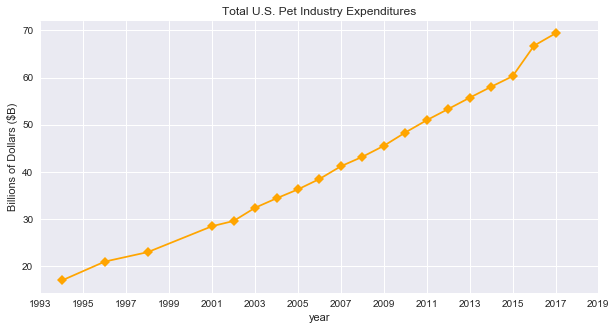

In [214]:
industry_df = pd.read_csv('pet_industry_trend.csv')#,encoding="ISO-8859-1",index_col=0)
industry_df.plot('year','expenditure',
                 style='-D',
                 color='orange',
                 figsize=(10,5),
                 xticks=range(1993,2020,2),
                 title='Total U.S. Pet Industry Expenditures',
                legend=False).set_ylabel('Billions of Dollars ($B)')
plt.gca().invert_xaxis()

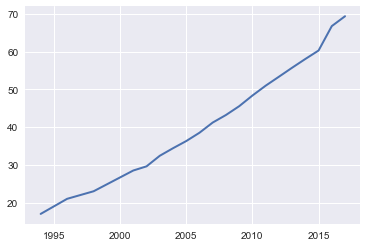

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
industry_df = pd.read_csv('pet_industry_trend.csv')#,encoding="ISO-8859-1",index_col=0)
yr=industry_df.year
exp=industry_df.expenditure
ax.plot(yr, exp, lw=2)
plt.xticks=range(1993,2020,2)
ax.invert_xaxis()
#industry_df.plot('year','expenditure',)
#plt.legend.remove()
#for xy in zip(industry_df.year, industry_df.expenditure):                                       # <--
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--
plt.gca().invert_xaxis()
plt.show()

In [83]:
from bokeh.plotting import figure
from bokeh.io import output_file, show
p = figure(title="simple line example",
 x_axis_label='Year',
 y_axis_label='Expenditure')
p.line(industry_df.year, industry_df.expenditure, legend="Temp.", line_width=2)
show(p)